In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import pickle
from datetime import datetime

In [24]:
# This script assumes

# 1. the waiting time inbetween two test runs are larger than the waiting times within 
# each test run, e.g., 30 between test runs and 20 in between individual 
time_gap_threshold = 5
#waiting_times_individual_actions = 20

minimum_duration_threshold = 5 # number of seconds a run should be

# 2. there are a certain number of test runs (those runs that last the longest)
number_of_tests = 30

# 3. when is the spike done?
spike_done = 20


In [25]:
ls ../Results-Raw/site3/30Run1.csv

../Results-Raw/site3/30Run1.csv


In [54]:
# File path to the CSV file
csv_file_path3 = '../Results-Raw/site3/30Run1.csv'
csv_file_path4 = '../Results-Raw/site4/30Run1.csv'
csv_file_path6 = '../Results-Raw/site6/30Run1.csv'

# Define the columns to import
columns_to_import = [1,2,3,5,6,8,9]

# Define the column names to rename the imported columns
column_names = ['time', 'minutes', 'dateTime', 'Clientcurrent', 'Clientpower','Servercurrent','Serverpower']

# Step 1: Load the CSV file with a suitable delimiter
df3 = pd.read_csv(csv_file_path3, delimiter=';', decimal=",", usecols=columns_to_import ,header=0, names=column_names, skipinitialspace=True)
df4 = pd.read_csv(csv_file_path4, delimiter=';', decimal=",", usecols=columns_to_import ,header=0, names=column_names, skipinitialspace=True)
df6 = pd.read_csv(csv_file_path6, delimiter=';', decimal=",", usecols=columns_to_import ,header=0, names=column_names, skipinitialspace=True)


In [55]:
#df3[(df3['Clientpower']<0.5)|(df3['Serverpower']<0.5)]

In [56]:
#test = ((df3['Clientpower']<0.5)|(df3['Serverpower']<0.5))
#print(df3.count())
#print(df3[~test].count())
#
#df3 =df3[~test]

In [57]:
print(df3.dtypes,df4.dtypes,df6.dtypes)

time             float64
minutes          float64
dateTime         float64
Clientcurrent    float64
Clientpower      float64
Servercurrent    float64
Serverpower      float64
dtype: object time             float64
minutes          float64
dateTime         float64
Clientcurrent    float64
Clientpower      float64
Servercurrent    float64
Serverpower      float64
dtype: object time             float64
minutes          float64
dateTime         float64
Clientcurrent    float64
Clientpower      float64
Servercurrent    float64
Serverpower      float64
dtype: object


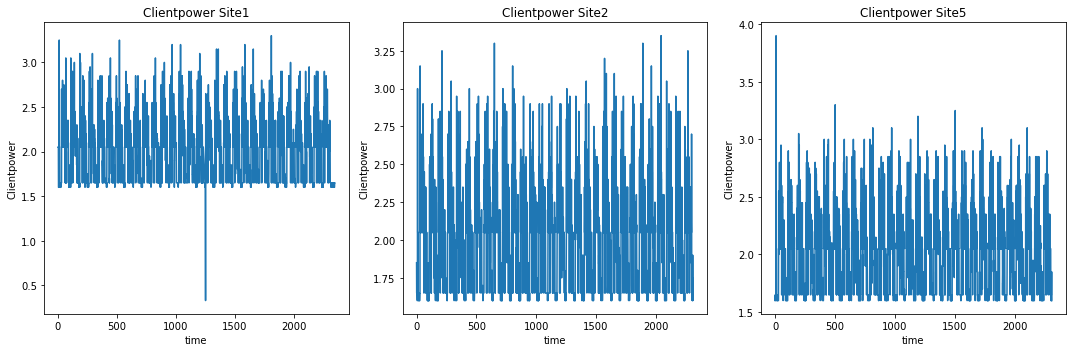

In [58]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each Clientpower on a separate subplot
sns.lineplot(data=df3, x='time', y='Clientpower', ax=axes[0])
axes[0].set_title('Clientpower Site1')

sns.lineplot(data=df4, x='time', y='Clientpower', ax=axes[1])
axes[1].set_title('Clientpower Site2')

sns.lineplot(data=df6, x='time', y='Clientpower', ax=axes[2])
axes[2].set_title('Clientpower Site5')

# Adjust layout
plt.tight_layout()
plt.show()

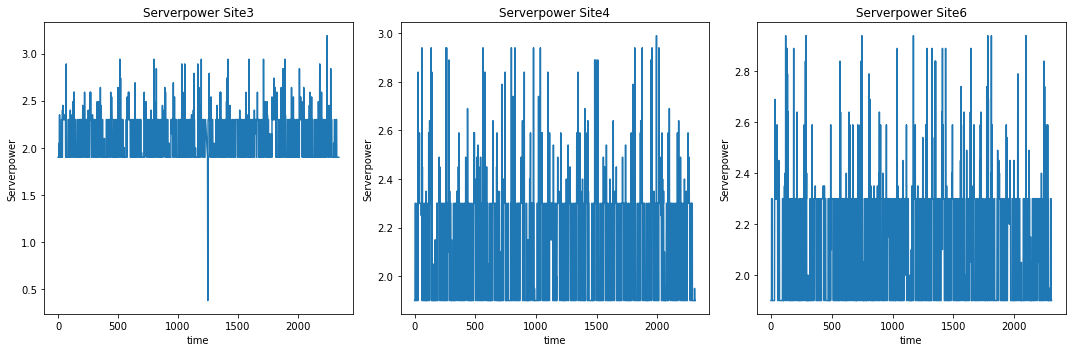

In [59]:
#sns.lineplot(data=df1,x="time",y="Serverpower")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each Clientpower on a separate subplot
sns.lineplot(data=df3, x='time', y='Serverpower', ax=axes[0])
axes[0].set_title('Serverpower Site3')

sns.lineplot(data=df4, x='time', y='Serverpower', ax=axes[1])
axes[1].set_title('Serverpower Site4')

sns.lineplot(data=df6, x='time', y='Serverpower', ax=axes[2])
axes[2].set_title('Serverpower Site6')

# Adjust layout
plt.tight_layout()
plt.show()

# Choose Data

In [167]:
# For each data frame 
# --- 1,2,5
# 3,4,6
number = 1
df = df1


site = 'site'+str(number)
'''
Site 1 = our own theme with our own plugin 
Site 2 = our own theme with no plugin 
Site 3 = 2023 with no plugin 
Site 4 = 2023 with Smush plugin 
Site 5 = our own with Smush plugin
Site 6 = 2023 with own plugin
'''
if number == 1:
    plugin = 'Our'
    theme = 'Our'
elif number == 2:
    plugin = '-'
    theme = 'Our'
elif number == 3:
    plugin = '-'
    theme = '2023'
elif number == 4:
    plugin = 'Smush'
    theme = '2023'
elif number == 5:
    plugin = 'Smush'
    theme = 'Our'
elif number == 6:
    plugin = 'Our'
    theme = '2023'

NameError: name 'df1' is not defined

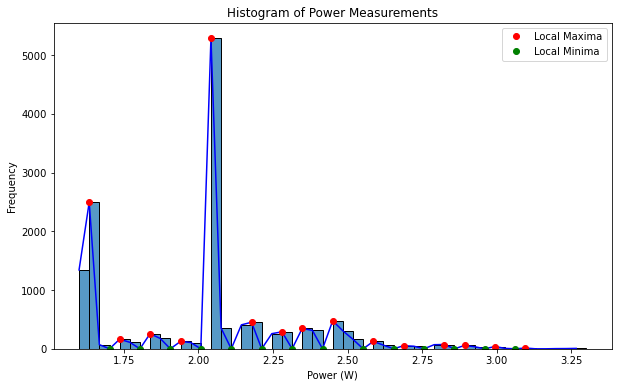

Local Maxima (Power values): [1.634 1.736 1.838 1.94  2.042 2.178 2.28  2.348 2.45  2.586 2.688 2.824
 2.892 2.994 3.096]
Local Minima (Power values between peaks): [1.702 1.804 1.906 2.008 2.11  2.212 2.314 2.416 2.552 2.654 2.756 2.858
 2.96  3.062]


In [168]:

# Step 1: Plot histogram of power values
plt.figure(figsize=(10, 6))
sns.histplot(df['Clientpower'], bins=50, kde=False)
plt.xlabel('Power (W)')
plt.ylabel('Frequency')
plt.title('Histogram of Power Measurements')

# Step 2: Create the histogram data
hist, bin_edges = np.histogram(df['Clientpower'], bins=50)

# Step 3: Find local maxima (peaks)
peaks, _ = find_peaks(hist)

# Step 4: Find local minima (valleys) by inverting the histogram
minima, _ = find_peaks(-hist)

# Step 5: Find minima between each pair of consecutive maxima
minima_between_peaks = []
for i in range(len(peaks) - 1):
    # Find minima between peak i and peak i+1
    minima_in_range = [m for m in minima if peaks[i] < m < peaks[i + 1]]
    if minima_in_range:
        minima_between_peaks.append(minima_in_range[0])  # Append the first minima between the peaks

# Step 6: Plot the histogram curve
plt.plot(bin_edges[:-1], hist, color='blue')

# Mark the local maxima
plt.plot(bin_edges[peaks], hist[peaks], 'ro', label="Local Maxima")

# Mark the local minima between peaks
plt.plot(bin_edges[minima_between_peaks], hist[minima_between_peaks], 'go', label="Local Minima")

# Step 7: Show the plot with annotations
plt.legend(loc='upper right')
plt.show()

# Output the values of the minima and maxima
print("Local Maxima (Power values):", bin_edges[peaks])
print("Local Minima (Power values between peaks):", bin_edges[minima_between_peaks])


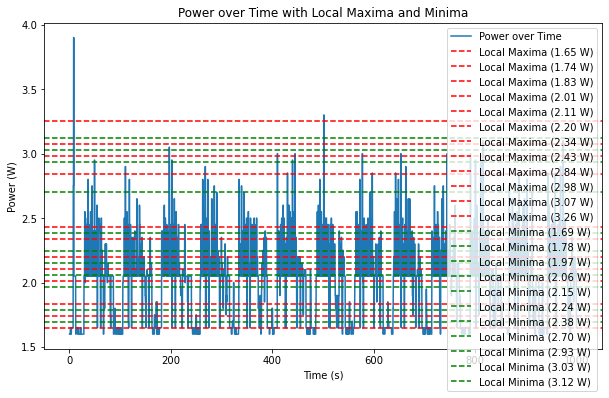

In [145]:
# Visual confirmation of thresholds

# Step 1: Plot the time series of power
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['time']<1000], x="time", y="Clientpower", label="Power over Time")

# Convert the bin_edges for maxima and minima to actual power values
local_maxima_values = bin_edges[peaks]
local_minima_values = bin_edges[minima_between_peaks]

# Step 2: Plot horizontal lines at the local maxima values (in red)
for value in local_maxima_values:
    plt.axhline(y=value, color='red', linestyle='--', label=f'Local Maxima ({value:.2f} W)')

# Step 3: Plot horizontal lines at the local minima values (in green)
for value in local_minima_values:
    plt.axhline(y=value, color='green', linestyle='--', label=f'Local Minima ({value:.2f} W)')

# Step 4: Show the plot with the horizontal lines for both maxima and minima
plt.title('Power over Time with Local Maxima and Minima')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.legend(loc='upper right')
plt.show()

In [146]:
df

,time,minutes,dateTime,Clientcurrent,Clientpower,Servercurrent,Serverpower
0,0.156,0.002600,1.727975e+09,0.32,1.60,0.38,1.9
1,0.261,0.004350,1.727975e+09,0.32,1.60,0.38,1.9
2,0.361,0.006017,1.727975e+09,0.32,1.60,0.38,1.9
3,0.459,0.007650,1.727975e+09,0.32,1.60,0.38,1.9
4,0.557,0.009283,1.727975e+09,0.32,1.60,0.38,1.9
...,...,...,...,...,...,...,...
14293,2307.677,38.461283,1.727977e+09,0.37,1.85,0.38,1.9
14294,2307.880,38.464667,1.727977e+09,0.32,1.60,0.38,1.9
14295,2308.080,38.468000,1.727977e+09,0.32,1.60,0.38,1.9
14296,2308.280,38.471333,1.727977e+09,0.32,1.60,0.38,1.9


In [147]:

# Define the waiting threshold as the first local minimum between the first two peaks
waiting_threshold = bin_edges[minima_between_peaks[0]]  # The first minimum between the first two peaks


<Figure size 720x432 with 0 Axes>

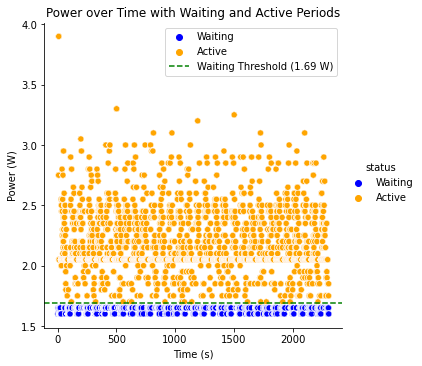

In [148]:
# Define the active measurements and waiting measurements using the waiting_threshold:

# Step 1: Classify each point in the time series as 'Waiting' or 'Active'
df['status'] = df['Clientpower'].apply(lambda x: 'Waiting' if x < waiting_threshold else 'Active')

# Step 2: Plot the time series, color-coding the waiting and active periods
plt.figure(figsize=(10, 6))
#sns.relplot(data=df[df['time']<500], x="time", y="power", hue='status', palette={'Waiting': 'blue', 'Active': 'orange'}, legend='full')
sns.relplot(data=df, x="time", y="Clientpower", hue='status', palette={'Waiting': 'blue', 'Active': 'orange'}, legend='full')

# Plot the threshold as a horizontal line
plt.axhline(y=waiting_threshold, color='green', linestyle='--', label=f'Waiting Threshold ({waiting_threshold:.2f} W)')

# Step 3: Show the plot
plt.title('Power over Time with Waiting and Active Periods')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.legend(loc='upper right')
plt.show()

# Optional: You can also isolate the waiting and active periods
waiting_periods = df[df['status'] == 'Waiting']
active_periods = df[df['status'] == 'Active']


In [149]:
df

,time,minutes,dateTime,Clientcurrent,Clientpower,Servercurrent,Serverpower,status
0,0.156,0.002600,1.727975e+09,0.32,1.60,0.38,1.9,Waiting
1,0.261,0.004350,1.727975e+09,0.32,1.60,0.38,1.9,Waiting
2,0.361,0.006017,1.727975e+09,0.32,1.60,0.38,1.9,Waiting
3,0.459,0.007650,1.727975e+09,0.32,1.60,0.38,1.9,Waiting
4,0.557,0.009283,1.727975e+09,0.32,1.60,0.38,1.9,Waiting
...,...,...,...,...,...,...,...,...
14293,2307.677,38.461283,1.727977e+09,0.37,1.85,0.38,1.9,Active
14294,2307.880,38.464667,1.727977e+09,0.32,1.60,0.38,1.9,Waiting
14295,2308.080,38.468000,1.727977e+09,0.32,1.60,0.38,1.9,Waiting
14296,2308.280,38.471333,1.727977e+09,0.32,1.60,0.38,1.9,Waiting


<Figure size 720x432 with 0 Axes>

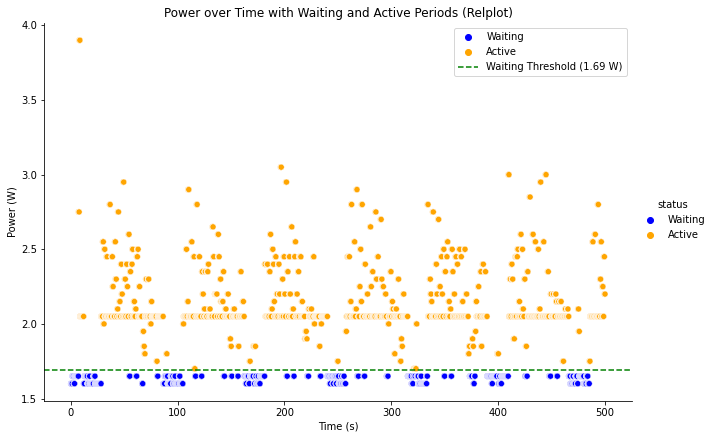

In [150]:
# Ensure the 'status' column is created using the correct threshold
#waiting_threshold = bin_edges[minima_between_peaks[0]]  # The first minimum between the first two peaks
#df['status'] = df['power'].apply(lambda x: 'Waiting' if x < waiting_threshold else 'Active')

# Create the relplot to visualize the waiting and active periods
plt.figure(figsize=(10, 6))
sns.relplot(data=df[df['time'] < 500], x="time", y="Clientpower", hue='status', 
            palette={'Waiting': 'blue', 'Active': 'orange'}, height=6, aspect=1.5)

# Plot the threshold as a horizontal line
plt.axhline(y=waiting_threshold, color='green', linestyle='--', label=f'Waiting Threshold ({waiting_threshold:.2f} W)')

# Show the plot
plt.title('Power over Time with Waiting and Active Periods (Relplot)')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.legend(loc='upper right')
plt.show()

In [151]:
# Remove everything until the spike:
df = df[df['time']>spike_done]

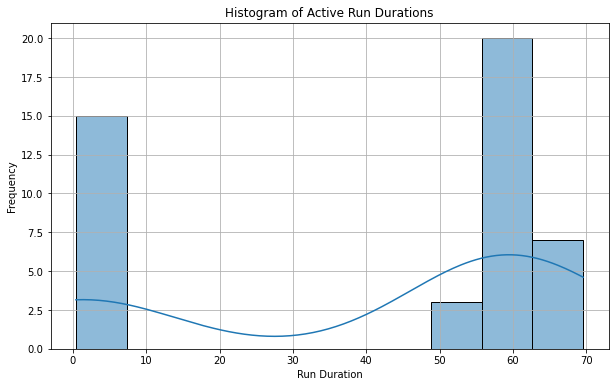

           time_min  time_max  duration
run_group                              
0            28.456    89.961    61.505
1           104.961   172.861    67.900
2           181.461   240.156    58.695
3           249.457   250.060     0.603
4           257.261   315.261    58.000
5           320.961   323.761     2.800
6           333.760   389.559    55.799
7           398.861   400.161     1.300
8           409.460   465.959    56.499
9           474.561   475.861     1.300
10          485.259   543.259    58.000
11          551.157   617.877    66.720
12          627.075   628.878     1.803
13          637.480   694.283    56.803
14          702.875   704.085     1.210
15          714.079   770.277    56.198
16          789.882   852.284    62.402
17          866.481   924.882    58.401
18          931.283   932.485     1.202
19          942.480   998.678    56.198
20         1018.276  1078.680    60.404
21         1094.280  1152.679    58.399
22         1160.478  1160.880     0.402


/var/folders/5q/p77nbv9d5617fggbztk7sms4pyrwyn/T/ipykernel_44595/1929792293.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['run'] = df.apply(classify_run, axis=1)


In [152]:

# divide the run based on a minimum waiting time between the runs

# Step 1: Filter only the "Active" periods
df_active = df[df['status'] == 'Active'].copy()

# Step 2: Calculate the time difference between consecutive rows in active periods
df_active['time_diff'] = df_active['time'].diff()

# Step 3: Identify periods where the time difference exceeds the threshold (i.e., new run)
df_active['is_new_run'] = df_active['time_diff'] > time_gap_threshold

# Step 4: Group active periods into individual runs based on time gaps
df_active['run_group'] = df_active['is_new_run'].cumsum()

# Step 5: Calculate the duration of each individual active run
run_durations = df_active.groupby('run_group').agg({'time': ['min', 'max']})
run_durations.columns = ['time_min', 'time_max']  # Simplify column names
run_durations['duration'] = run_durations['time_max'] - run_durations['time_min']

# Step 6: Plot the Histogram of Active Run Durations
plt.figure(figsize=(10, 6))
sns.histplot(data=run_durations, x='duration', bins=10, kde=True)  # KDE adds a density curve
plt.title('Histogram of Active Run Durations')
plt.xlabel('Run Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Output the identified active run durations
print(run_durations)

# Step 7: Add the hue column to the original dataframe, marking individual active runs
def classify_run(row):
    if row['status'] == 'Active':
        # Look up the corresponding run group from df_active
        run_group = df_active[df_active['time'] == row['time']]['run_group'].values
        if len(run_group) > 0:
            return f'Run {run_group[0]}'
    return 'Inactive'

df['run'] = df.apply(classify_run, axis=1)



# New Step: Reassign runs with short durations to "Waiting" after computing the run durations
# Define a duration threshold for reassigning small runs (for example, 5 seconds)
duration_threshold =  minimum_duration_threshold 

# Reassign runs with durations smaller than the threshold to "Waiting"
small_run_groups = run_durations[run_durations['duration'] < duration_threshold].index

# Update the original dataframe to mark small runs as "Waiting" and their group as -1
for run_group in small_run_groups:
    df.loc[df['run'] == f'Run {run_group}', 'status'] = 'Too small'
    df.loc[df['run'] == f'Run {run_group}', 'run'] = 'Too small'






In [153]:
df.head()

,time,minutes,dateTime,Clientcurrent,Clientpower,Servercurrent,Serverpower,status,run
199,20.058,0.334300,1.727975e+09,0.32,1.6,0.38,1.9,Waiting,Inactive
200,20.161,0.336017,1.727975e+09,0.32,1.6,0.38,1.9,Waiting,Inactive
201,20.260,0.337667,1.727975e+09,0.32,1.6,0.38,1.9,Waiting,Inactive
202,20.360,0.339333,1.727975e+09,0.32,1.6,0.38,1.9,Waiting,Inactive
203,20.459,0.340983,1.727975e+09,0.32,1.6,0.38,1.9,Waiting,Inactive


<Figure size 1728x432 with 0 Axes>

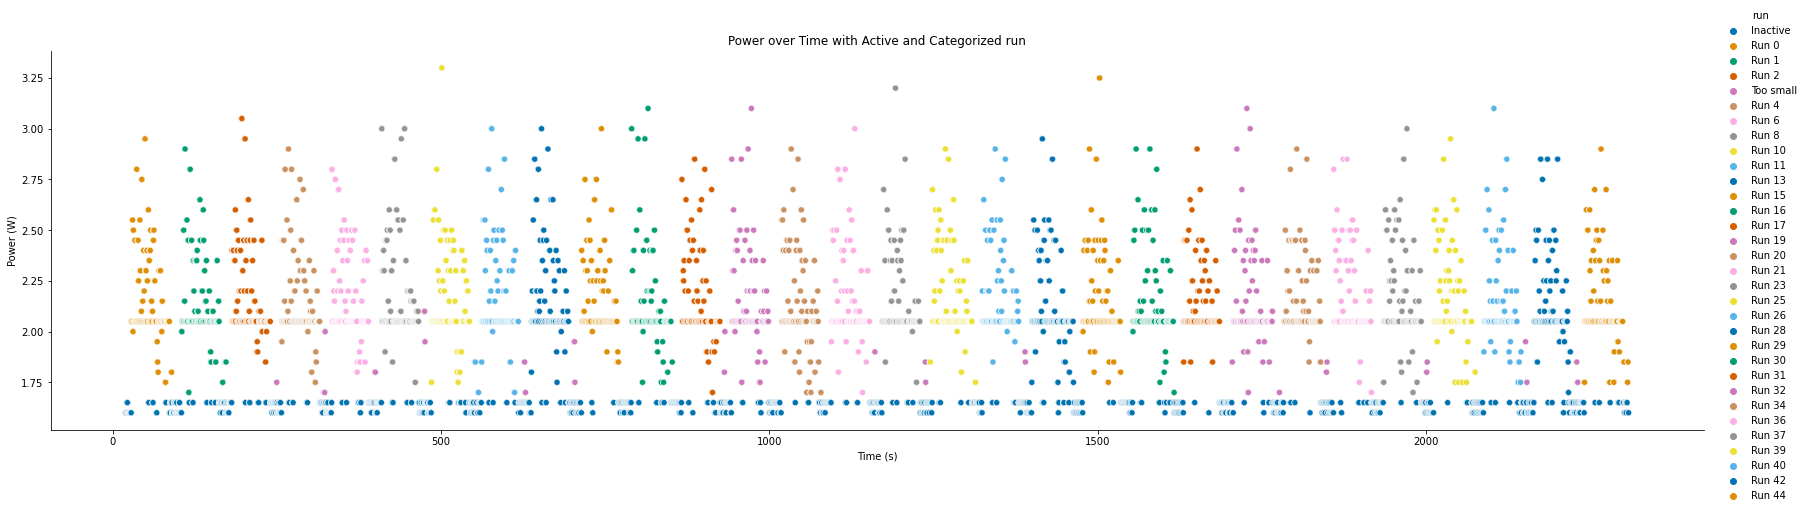

In [154]:
# Step 4: Create a relplot with hue for active and waiting categories
plt.figure(figsize=(24, 6))
sns.relplot(data=df, x="time", y="Clientpower", hue='run', height=6, aspect=4, palette='colorblind')
# sns.relplot(data=df, x="time", y="power", hue='hue',  height=6, aspect=1.5)

# Show the plot
plt.title('Power over Time with Active and Categorized run')
plt.xlabel('Time (s)')
plt.ylabel('Power (W)')
plt.savefig('numberofruns.png')
plt.show()


In [155]:
print(len(df['run'].unique()),df['run'].unique())

32 ['Inactive' 'Run 0' 'Run 1' 'Run 2' 'Too small' 'Run 4' 'Run 6' 'Run 8'
 'Run 10' 'Run 11' 'Run 13' 'Run 15' 'Run 16' 'Run 17' 'Run 19' 'Run 20'
 'Run 21' 'Run 23' 'Run 25' 'Run 26' 'Run 28' 'Run 29' 'Run 30' 'Run 31'
 'Run 32' 'Run 34' 'Run 36' 'Run 37' 'Run 39' 'Run 40' 'Run 42' 'Run 44']


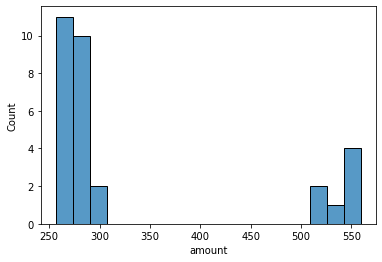

In [156]:
df_active = df[(df['run']!='Inactive') & (df['run']!='Too small')]

mean_client_array=[0]*(number_of_tests)
mean_server_array=[0]*(number_of_tests)
time_array =[0]*(number_of_tests)
df_active_grouped_by_run = df_active.groupby('run')
i=0
mean_client_list = []
mean_server_list = []
time_list = []
test_run_list = []
number_of_measures_in_group = []
for run_no, df_run in df_active_grouped_by_run:
   # df_active_grouped_by_waiting_group = df_run.groupby('waiting_group')
    
   # for number,df_waiting_group in df_active_grouped_by_waiting_group:
   #     number_of_measures_in_waiting_group.append(df_waiting_group['Clientpower'].count())
   #     if df_waiting_group['Clientpower'].count()>70:
            #print(number,df_waiting_group)
            #print(df_waiting_group['power'].mean())
    
    number_of_measures_in_group.append(df_run['Clientpower'].count())    
    mean_client_list.append(df_run['Clientpower'].mean())
    mean_server_list.append(df_run['Serverpower'].mean())
    test_run_list.append(run_no)
    #print(df_run['time'].max(),df_run['time'].min())
    time_list.append(df_run['time'].max()-df_run['time'].min())
    
    #print(mean_array)
    i = i+1

df_amount=pd.DataFrame(columns=['amount'], data=number_of_measures_in_group)
sns.histplot(data=df_amount,x='amount')
    
df_energy = pd.DataFrame({'avg client power':mean_client_list,'avg server power':mean_server_list,'time':time_list,'runID':test_run_list, 'no_of_measurements':number_of_measures_in_group})

#pd.DataFrame(columns=['amount','time'], data=number_of_measures_in_waiting_group)
#df_mean_power_run2 = pd.DataFrame(columns=['avg power'], data= mean_array[1])
#df_mean_power_run3 = pd.DataFrame(columns=['avg power'], data= mean_array[2])
#df_mean_power_run4 = pd.DataFrame(columns=['avg power'], data= mean_array[3])


In [157]:
# check that the expected number of runs are measured
display(df_energy.describe())
#display(df_mean_power_run2.describe())
#display(df_mean_power_run3.describe())
#display(df_mean_power_run4.describe())

,avg client power,avg server power,time,no_of_measurements
count,30.000000,30.000000,30.000000,30.000000
mean,2.161665,2.151821,59.643367,337.866667
std,0.013706,0.025821,4.091714,114.038933
min,2.129831,2.095159,54.800000,257.000000
25%,2.154757,2.133887,56.575000,271.250000
50%,2.160943,2.153978,58.000000,283.000000
75%,2.173963,2.164563,62.251000,298.750000
max,2.184375,2.199051,69.600000,559.000000


In [158]:
df_energy['runID'].unique()

array(['Run 0', 'Run 1', 'Run 10', 'Run 11', 'Run 13', 'Run 15', 'Run 16',
       'Run 17', 'Run 19', 'Run 2', 'Run 20', 'Run 21', 'Run 23',
       'Run 25', 'Run 26', 'Run 28', 'Run 29', 'Run 30', 'Run 31',
       'Run 32', 'Run 34', 'Run 36', 'Run 37', 'Run 39', 'Run 4',
       'Run 40', 'Run 42', 'Run 44', 'Run 6', 'Run 8'], dtype=object)

In [159]:
df_energy['client energy'] = df_energy['time']*df_energy['avg client power']
df_energy['server energy'] = df_energy['time']*df_energy['avg server power']

In [160]:
# Using pd.melt to convert to long format
df_energy_long = pd.melt(df_energy, 
                  id_vars=["avg client power","avg server power","time"],  # Columns to keep as identifier
                  value_vars=['client energy', 'server energy'],  # Columns to unpivot
                  var_name='computer',  # Name for the variable column
                  value_name='energy')   # Name for the value column

In [161]:
df_energy_long['site'] = number
df_energy_long['theme'] = theme
df_energy_long['plugin'] = plugin

In [166]:
df_energy_long.head()

,avg client power,avg server power,time,computer,energy,site,theme,plugin
0,2.160733,2.159320,61.505,client energy,132.895911,6,2023,Our
1,2.139714,2.192826,67.900,client energy,145.286565,6,2023,Our
2,2.177725,2.197572,58.000,client energy,126.308031,6,2023,Our
3,2.157343,2.133322,66.720,client energy,143.937902,6,2023,Our
4,2.184375,2.150772,56.803,client energy,124.079053,6,2023,Our


In [163]:
df_energy_long.to_csv('../Results-Energy/'+site+'-energy.csv',index=False)

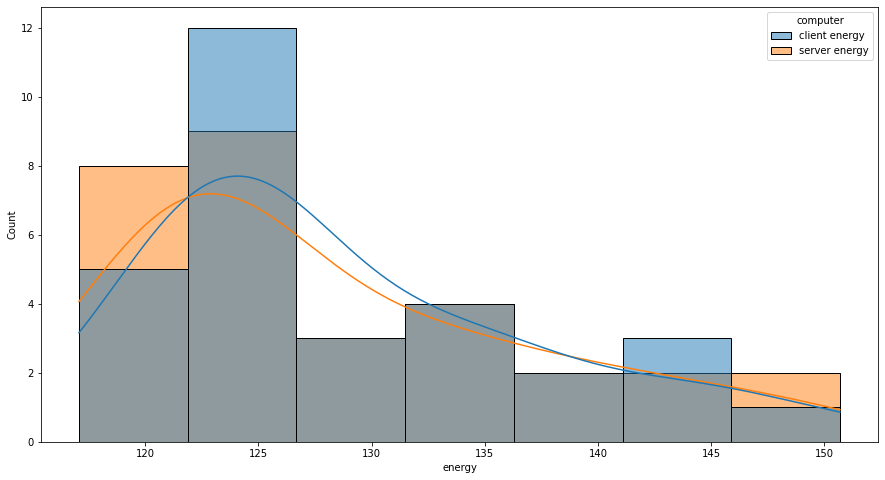

In [164]:
# seaborn

plt.figure(figsize=(15,8))
sns.histplot(data=df_energy_long, x='energy', hue="computer", kde=True)



plt.savefig('../Results-Energy/'+site+'-hist-energy.png')
plt.show()